In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [189]:
data = pd.read_csv('Advertising.csv')
data.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [193]:
data.shape

(200, 4)

In [259]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


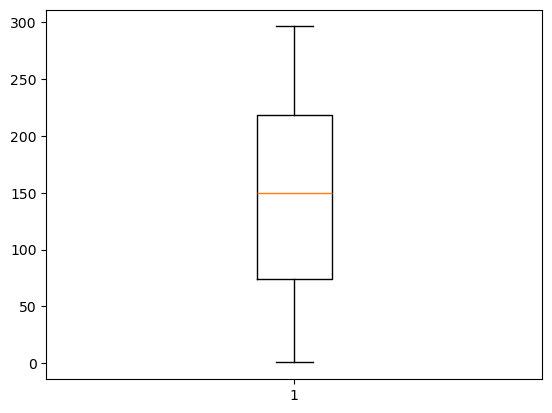

In [261]:
plt.boxplot(data = data , x = data['TV'])
plt.show()

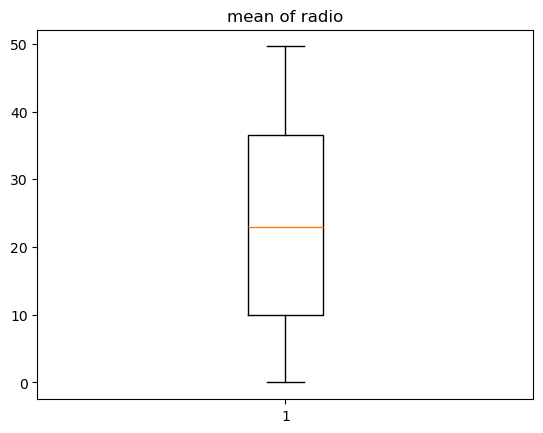

In [262]:
plt.boxplot(data = data , x = data['radio'])
plt.title('mean of radio')
plt.show()

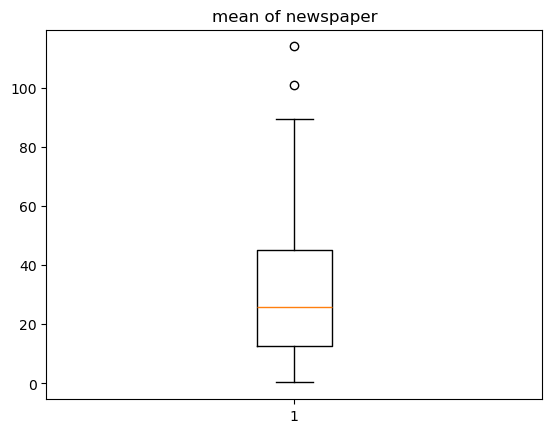

In [263]:
plt.boxplot(data = data , x = data['newspaper'])
plt.title('mean of newspaper')
plt.show()

In [265]:
x = data[['TV' , 	'radio' ,	'newspaper']]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [266]:
y = data['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [267]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)
x_train

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [269]:
y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 160, dtype: float64

In [270]:
model = LinearRegression()

In [272]:
model.fit(x_train , y_train)

LinearRegression()

In [279]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [280]:
priduction = model.predict(x_test)

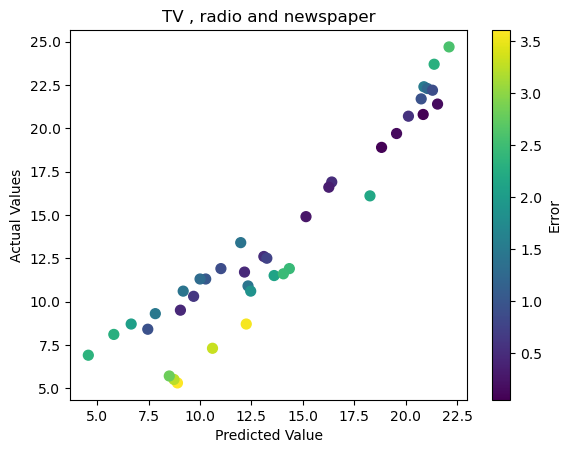

In [282]:
errors = np.abs(priduction - y_test)

plt.scatter(priduction , y_test , c =errors ,  s= 50)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Values')
plt.title('TV , radio and newspaper')

plt.colorbar(label = 'Error')
plt.show()

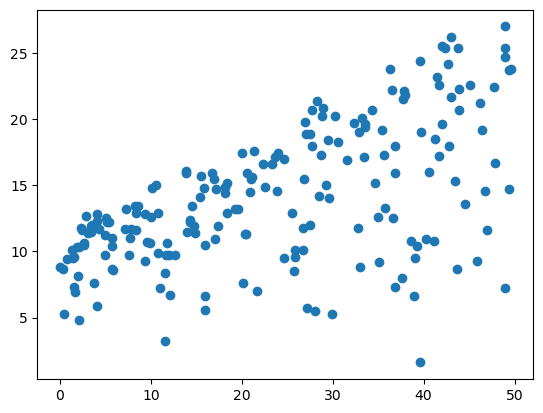

In [284]:
plt.scatter( x= data['radio'] , y = data['sales'])
plt.show()

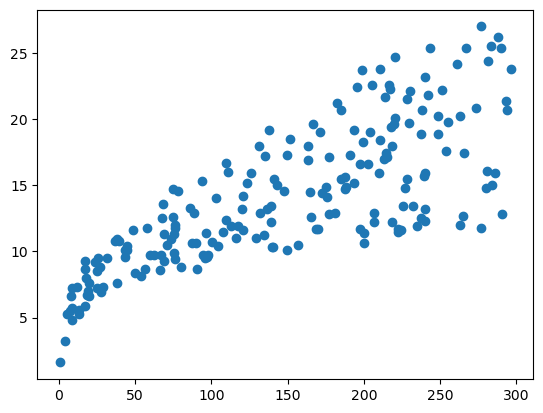

In [285]:
plt.scatter( x= data['TV'] , y = data['sales'])
plt.show()

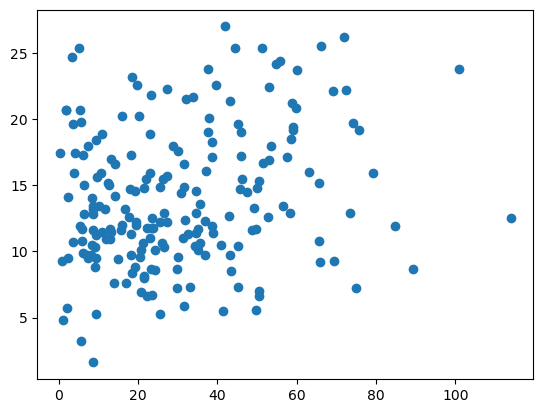

In [287]:
plt.scatter(x = data['newspaper'] , y = data['sales'])

In [301]:
pri = pd.DataFrame({
    'Actual' : y_test , 
    'preduction': priduction , 
    'Difference' : y_test - priduction
})
pri

,Actual,preduction,Difference
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070
